In [1]:
from pathlib import Path

import pandas as pd
from ast import literal_eval
import seaborn as sns
import tabulate

In [2]:
from IPython.core.display import display, HTML

# display(HTML("<style>.container { width:100% !important; }</style>"))

# Show all columns and everything inside it
pd.set_option("display.max_columns", None)
# pd.set_option("display.max_colwidth", None)

# Suppress scientific notation etc.
pd.set_option("display.precision", 2)
pd.options.display.float_format = "{:,.2f}".format

/tmp/ipykernel_949656/3442233968.py:1: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


In [3]:
def print_full(x):
    pd.set_option("display.max_rows", None)
    pd.set_option("display.max_columns", None)
    pd.set_option("display.width", 2000)
    pd.set_option("display.float_format", "{:20,.2f}".format)
    pd.set_option("display.max_colwidth", None)
    display(x)
    pd.reset_option("display.max_rows")
    pd.reset_option("display.max_columns")
    pd.reset_option("display.width")
    pd.reset_option("display.float_format")
    pd.reset_option("display.max_colwidth")

In [4]:
%load_ext jupyter_black

**The CSV has all rows of docs whose PDF we have included. Some don't have TXTs - then txt_fn is None**

In [5]:
# Path to merged CSV containing PDF+spacy+ld stats
CSV_PATH = Path("../data/metadata.csv")

In [6]:
df = pd.read_csv(CSV_PATH)
# Drop old columns with errors, there should be none there
# df.drop(columns=["error", "exception_text"], inplace=True)
df.head()

,num_pages,source_fn,txt_fn,collection,num_chars,num_tokens,num_sentences,token_len,sentence_len,tokens_per_page,ISIN,country,pdf_only,language,is_empty
0,19,Final_terms/Country_of_origin_DE/lang_DE_EN/DE...,Final_terms/DE000HLB7C13.pdf.txt,Final_terms,"54,319.00","8,365.00",340.00,6.49,24.60,440.26,DE000HLB7C13,DE,False,DE,NaN
1,14,Final_terms/Country_of_origin_DE/lang_DE_EN/DE...,Final_terms/DE000NWB2ME7.pdf.txt,Final_terms,"23,605.00","4,354.00",183.00,5.42,23.79,311.00,DE000NWB2ME7,DE,False,"EN,DE",NaN
2,25,Final_terms/Country_of_origin_DE/lang_DE_EN/DE...,Final_terms/DE000DFK0TS8.pdf.txt,Final_terms,"70,180.00","12,733.00",748.00,5.51,17.02,509.32,DE000DFK0TS8,DE,False,"EN,DE",NaN
3,15,Final_terms/Country_of_origin_DE/lang_DE_EN/DE...,Final_terms/DE000LB2CZ54.pdf.txt,Final_terms,"46,594.00","7,544.00",291.00,6.18,25.92,502.93,DE000LB2CZ54,DE,False,DE,NaN
4,25,Final_terms/Country_of_origin_DE/lang_DE_EN/DE...,Final_terms/DE000BLB80W4.pdf.txt,Final_terms,"59,569.00","9,578.00",350.00,6.22,27.37,383.12,DE000BLB80W4,DE,False,DE,NaN


In [7]:
df.collection.value_counts()

collection
Final_terms                10450
BBK_monthly                  838
Base_prospectuses            593
Law                          134
Informational_materials      129
Annual_reports                88
IFRS                           7
Name: count, dtype: int64

In [8]:
# Useful keys

KCOL = "collection_name"
KCOL_OLD = "collection"
KEY_BB = "BBK_monthly"

In [9]:
# Pretty names for columns in graphs
RENAMES = {
    "Final_terms": "Final terms",
    "Law": "Law",
    "Informational_materials": "Informational materials",
    # "Brochures_and_InfoMaterials": "Brochures & Handouts",
    # "Brochures_and_InfoMaterials": "Brochures",
    "BBK_monthly": "BBK monthly",
    "Annual_reports": "Annual reports",
    "Base_prospectuses": "Base prospectuses",
    "IFRS": "IFRS",
}

df[KCOL] = df[KCOL_OLD].apply(lambda x: RENAMES[x])

In [10]:
# Will use that specific order when sorting!
COLLECTIONS_ORDER = [
    "Final terms",
    "Base prospectuses",
    "Annual reports",
    "Informational materials",
    "Law",
    "IFRS",
    "BBK monthly",
]
df[KCOL] = pd.Categorical(df[KCOL], categories=COLLECTIONS_ORDER, ordered=True)
df.sort_values(KCOL, ascending=True)

,num_pages,source_fn,txt_fn,collection,num_chars,num_tokens,num_sentences,token_len,sentence_len,tokens_per_page,ISIN,country,pdf_only,language,is_empty,collection_name
0,19,Final_terms/Country_of_origin_DE/lang_DE_EN/DE...,Final_terms/DE000HLB7C13.pdf.txt,Final_terms,"54,319.00","8,365.00",340.00,6.49,24.60,440.26,DE000HLB7C13,DE,False,DE,NaN,Final terms
7618,52,Final_terms/Country_of_origin_DE/lang_DE_EN/DE...,Final_terms/DE000DK0RXR2.pdf.txt,Final_terms,"141,370.00","22,526.00",866.00,6.28,26.01,433.19,DE000DK0RXR2,DE,False,DE,NaN,Final terms
7619,25,Final_terms/Country_of_origin_DE/lang_DE_EN/DE...,Final_terms/DE000BLB7T09.pdf.txt,Final_terms,"58,820.00","9,890.00",341.00,5.95,29.00,395.60,DE000BLB7T09,DE,False,DE,NaN,Final terms
7620,14,Final_terms/Country_of_origin_DE/lang_DE_EN/DE...,Final_terms/DE000LB32WV3.pdf.txt,Final_terms,"45,997.00","7,448.00",287.00,6.18,25.95,532.00,DE000LB32WV3,DE,False,DE,NaN,Final terms
7621,2,Final_terms/Country_of_origin_DE/lang_DE_EN/DE...,Final_terms/DE000A1X3FM4.pdf.txt,Final_terms,"5,845.00","1,016.00",45.00,5.75,22.58,508.00,DE000A1X3FM4,DE,False,DE,NaN,Final terms
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6514,186,Monthly_reports_BB/2019-01-monatsbericht-data.pdf,NaN,BBK_monthly,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,NaN,NaN,BBK monthly
3312,148,Monthly_reports_BB/2002-03-monatsbericht-data.pdf,NaN,BBK_monthly,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,NaN,NaN,BBK monthly
4101,156,Monthly_reports_BB/2013-02-monatsbericht-data.pdf,NaN,BBK_monthly,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,NaN,NaN,BBK monthly
8536,166,Monthly_reports_BB/2022-11-monatsbericht-data.pdf,NaN,BBK_monthly,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,NaN,NaN,BBK monthly


## Collection-level stats

In [11]:
df["has_text"] = ~df["pdf_only"]

In [12]:
ds = df.groupby(KCOL).has_text.agg(["sum", "count", "mean"])  # .reset_index()
ds.columns = ["# txt", "# pdf", "txt (%)"]
# ds["%txt"] *= 100
ds["txt (%)"] = ds["txt (%)"].apply("{:.1%}".format)
ds

/tmp/ipykernel_949656/1079239742.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  ds = df.groupby(KCOL).has_text.agg(["sum", "count", "mean"])  # .reset_index()


,# txt,# pdf,txt (%)
collection_name,,,
Final terms,9591,10450,91.8%
Base prospectuses,590,593,99.5%
Annual reports,87,88,98.9%
Informational materials,127,129,98.4%
Law,134,134,100.0%
IFRS,7,7,100.0%
BBK monthly,0,838,0.0%


/tmp/ipykernel_949656/2677544224.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=30)


(0.0, 11572.5)

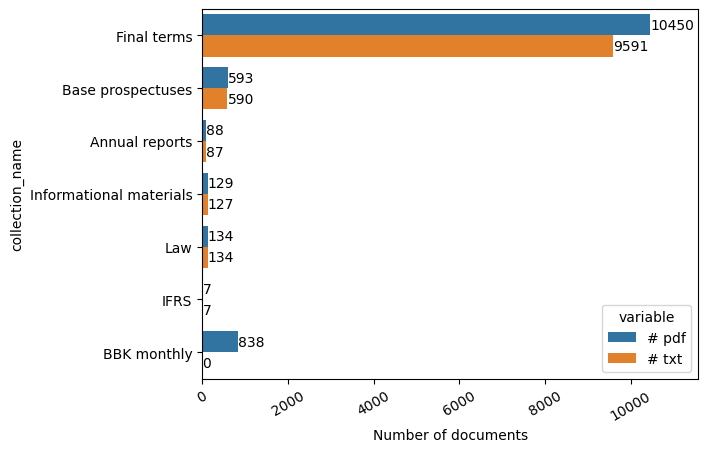

In [13]:
dss = ds.reset_index().melt(id_vars=["collection_name"]).sort_values("variable")
ax = sns.barplot(
    dss[dss.variable != "txt (%)"],
    y="collection_name",
    x="value",
    hue="variable",
    # log=True,
)

# label points
for i in ax.axes.containers:
    texts = ax.bar_label(
        i,
    )

# make the labels fit the limits
ax.set_xticklabels(ax.get_xticklabels(), rotation=30)

ax.set_xlabel("Number of documents")

xlim = ax.axes.get_xlim()[1]
# new_xlim = xlim + 9000
new_xlim = xlim + 600

ax.axes.set_xlim(0, new_xlim)

In [14]:
df[(df.pdf_only == False)].groupby(KCOL, observed=True)[
    [
        "num_pages",
        "num_tokens",
        "num_sentences",
        "sentence_len",
        "token_len",
        "tokens_per_page",
    ]
].agg(
    [
        "mean",
        "std",
        # "sum",
    ]
)

num_pages        num_tokens            num_sentences  \
                             mean    std       mean        std          mean   
collection_name                                                                
Final terms                 23.24  20.76  10,441.27  10,186.65        412.77   
Base prospectuses          145.72 245.37  79,112.20 141,770.78      3,312.57   
Annual reports             202.72 144.00 102,980.10  87,012.12      4,362.82   
Informational materials     19.94  38.28   7,821.61  13,135.53        365.46   
Law                         51.75 175.79  34,057.81 124,446.38      1,010.40   
IFRS                     1,264.86  88.62 604,974.43  49,840.85     25,994.14   

                                 sentence_len      token_len       \
                             std         mean  std      mean  std   
collection_name                                                     
Final terms               383.20        25.12 5.46      5.95 0.46   
Base prospectuses       6,059.04        25.62 7.06      5.62 0.38   
Annual reports          3,422.17        24.02 3.50      5.85 0.45   
Informational materials   618.54        22.38 5.98      5.94 0.52   
Law                     3,940.74        33.88 8.84      5.81 0.46   
IFRS                    1,782.64        23.25 0.41      6.41 0.03   

                        tokens_per_page         
                                   mean    std  
collection_name                                 
Final terms                      440.95 120.41  
Base prospectuses                494.56 175.62  
Annual reports                   496.03 112.89  
Informational materials          598.37 298.70  
Law                              596.04 166.65  
IFRS                             477.93   7.62

In [15]:
dg_pdf = df.groupby(KCOL, observed=True).agg(
    _num_pdf=("num_pages", "count"),
    # _num_pages_pdf=("num_pages", "sum"),
    # n_pdf_pages=("num_pages", "sum"),
)
dg = (
    df[(df.collection != KEY_BB) & (df.pdf_only == False)]
    .groupby(KCOL, observed=True)
    .agg(  # _'s are supposed to become newlines in the latex table
        _num_txt=("num_pages", "count"),
        _num_pages=("num_pages", "sum"),
        mean_num_pages=("num_pages", "mean"),
        _num_tokens=("num_tokens", "sum"),
        _num_sent=("num_sentences", "sum"),
        mean_length_sent=("sentence_len", "mean"),
    )
)

dg_final = dg_pdf.join(dg)

# calculate TOTAL only on column names not containing "mean"
INT_COLS_f = lambda x: [c for c in list(x.columns) if "mean_" not in c]
FLOAT_COLS_f = lambda x: [c for c in list(x.columns) if c not in INT_COLS]
INT_COLS = INT_COLS_f(dg)
FLOAT_COLS = FLOAT_COLS_f(dg)

dg_final.loc["BBK monthly", "_num_pages"] = df[
    df[KCOL] == "BBK monthly"
].num_pages.sum()
dg_final.loc["BBK monthly", "_num_txt"] = 0

# calculate on all int columns from dg, and calculate sum on dg_total (that is, including the PDFs from dg_pdf)
dg_final.loc["TOTAL", INT_COLS] = dg_final.sum(numeric_only=True)
dg_final.loc["TOTAL", "_num_pdf"] = dg_final._num_pdf.sum()

# BBK monthly has no TXT files -> 0, not nan


dg_final

,_num_pdf,_num_txt,_num_pages,mean_num_pages,_num_tokens,_num_sent,mean_length_sent
collection_name,,,,,,,
Final terms,"10,450.00","9,591.00","222,923.00",23.24,"100,142,176.00","3,958,882.00",25.12
Base prospectuses,593.00,590.00,"85,976.00",145.72,"46,676,196.00","1,954,417.00",25.62
Annual reports,88.00,87.00,"17,637.00",202.72,"8,959,269.00","379,565.00",24.02
Informational materials,129.00,127.00,"2,532.00",19.94,"993,344.00","46,413.00",22.38
Law,134.00,134.00,"6,934.00",51.75,"4,563,746.00","135,394.00",33.88
IFRS,7.00,7.00,"8,854.00","1,264.86","4,234,821.00","181,959.00",23.25
BBK monthly,838.00,0.00,"110,684.00",NaN,NaN,NaN,NaN
TOTAL,"12,239.00","10,536.00","455,540.00",NaN,"165,569,552.00","6,656,630.00",NaN


In [16]:
# Ugliest way ever to highlight last row of latex table
def latex_escape_string(chars) -> str:
    ns = ""
    for c in chars:
        ns += tabulate.LATEX_ESCAPE_RULES.get(c, c)
    return ns

In [17]:
# Manually format all numbers to be strings
dg_final_txt = dg_final.applymap("{:,.0f}".format)

# Make the last row bold
dg_final_txt.loc["TOTAL"] = (
    dg_final_txt.loc["TOTAL"].astype(str).apply(lambda x: "\\textbf{" + str(x) + "}")
)

# Escape the names of datasets and the column names
dg_final_txt = dg_final_txt.set_index(
    dg_final_txt.reset_index().collection_name.apply(latex_escape_string).values
)

# Convert col names into latex and then newlines
esc_col_names = [latex_escape_string(c) for c in dg_final_txt.columns]
esc_col_names = [c for c in dg_final_txt.columns]
# esc_col_names = [c.replace("\_", "\\\\") for c in esc_col_names]

table = tabulate.tabulate(
    dg_final_txt,
    # tablefmt="latex",
    tablefmt="latex_raw",  #!
    # headers=dg_final_txt.columns,
    headers=esc_col_names,
    floatfmt=",.0f",
)
table = table.replace("nan", "-")

print(table)

\begin{tabular}{llllllll}
\hline
                         & _num_pdf        & _num_txt        & _num_pages       & mean_num_pages   & _num_tokens          & _num_sent          & mean_length_sent   \\
\hline
 Final terms             & 10,450          & 9,591           & 222,923          & 23               & 100,142,176          & 3,958,882          & 25                 \\
 Base prospectuses       & 593             & 590             & 85,976           & 146              & 46,676,196           & 1,954,417          & 26                 \\
 Annual reports          & 88              & 87              & 17,637           & 203              & 8,959,269            & 379,565            & 24                 \\
 Informational materials & 129             & 127             & 2,532            & 20               & 993,344              & 46,413             & 22                 \\
 Law                     & 134             & 134             & 6,934            & 52               & 4,563,746            & 1

/tmp/ipykernel_949656/3667824804.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  dg_final_txt = dg_final.applymap("{:,.0f}".format)


## Languages

In [18]:
df[~df.language.isin(["DE", "EN,DE"])]

,num_pages,source_fn,txt_fn,collection,num_chars,num_tokens,num_sentences,token_len,sentence_len,tokens_per_page,ISIN,country,pdf_only,language,is_empty,collection_name,has_text
17,12,Final_terms/Country_of_origin_XS/lang_DE_EN/XS...,NaN,Final_terms,NaN,NaN,NaN,NaN,NaN,NaN,XS2297684842,XS,True,NaN,NaN,Final terms,False
18,127,Final_terms/Country_of_origin_OTHER/lang_DE_EN...,NaN,Final_terms,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,NaN,NaN,Final terms,False
19,15,Final_terms/Country_of_origin_XS/lang_DE_EN/XS...,NaN,Final_terms,NaN,NaN,NaN,NaN,NaN,NaN,XS1941813617,XS,True,NaN,NaN,Final terms,False
25,132,Monthly_reports_BB/2006-01-monatsbericht-data.pdf,NaN,BBK_monthly,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,NaN,NaN,BBK monthly,False
28,80,Monthly_reports_BB/1959-02-monatsbericht-data.pdf,NaN,BBK_monthly,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,NaN,NaN,BBK monthly,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12234,134,Monthly_reports_BB/ocr-1982-06-monatsbericht-d...,NaN,BBK_monthly,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,NaN,False,BBK monthly,False
12235,140,Monthly_reports_BB/ocr-1988-02-monatsbericht-d...,NaN,BBK_monthly,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,NaN,False,BBK monthly,False
12236,128,Monthly_reports_BB/ocr-1971-09-monatsbericht-d...,NaN,BBK_monthly,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,NaN,False,BBK monthly,False
12237,140,Monthly_reports_BB/ocr-1982-12-monatsbericht-d...,NaN,BBK_monthly,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,NaN,False,BBK monthly,False


In [19]:
# From now on DFL is the dataframe where stats make sense
dfl = df[df.pdf_only == False]

In [20]:
dfl.language.value_counts() / len(dfl)

language
DE      0.71
EN,DE   0.29
Name: count, dtype: float64

<Axes: xlabel='language', ylabel='count'>

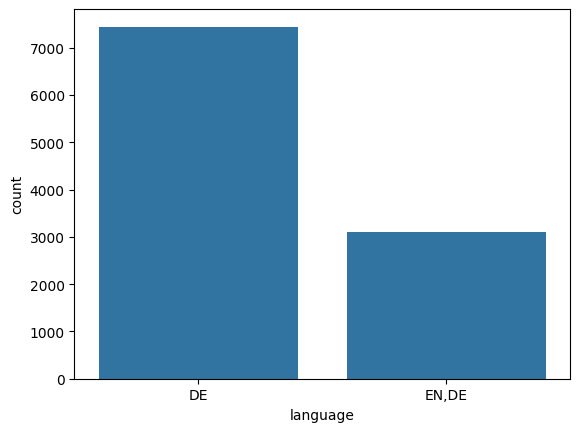

In [21]:
sns.countplot(dfl, x="language")

<Axes: xlabel='collection_name', ylabel='probability'>

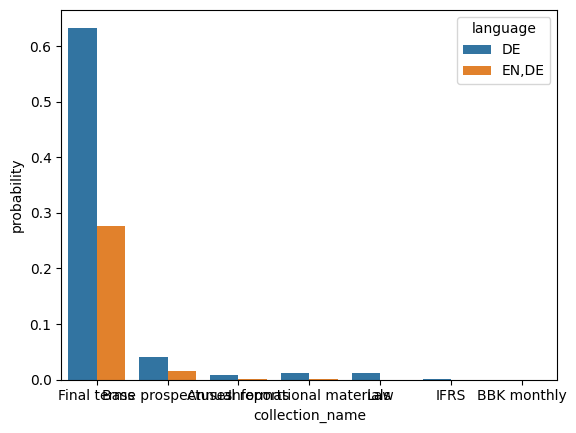

In [24]:
sns.countplot(dfl, hue="language", x=KCOL, stat="probability")

In [107]:
ggg = dfl[[KCOL_OLD, "language"]]
# ggg["n"] = 1
# ggg = ggg.groupby(KCOL).count()  # , "language"]).count().reset_index()
# ggg = ggg.groupby([KCOL, "language"]).count().reset_index()  # .groupby(KCOL).n.sum()
# ggg = ggg.groupby(KCOL, observed=True).value_counts(normalize=True)
ggg = ggg.groupby("collection").value_counts(normalize=True).mul(100)
ggg = pd.DataFrame(ggg).reset_index()  # .rename(columns={'proportion':''})
# ggg = ggg[ggg.collection_name != "BBK monthly"]
ggg

,collection,language,proportion
0,Annual_reports,DE,96.55
1,Annual_reports,"EN,DE",3.45
2,Base_prospectuses,DE,71.19
3,Base_prospectuses,"EN,DE",28.81
4,Final_terms,DE,69.60
5,Final_terms,"EN,DE",30.40
6,IFRS,DE,100.00
7,Informational_materials,DE,96.85
8,Informational_materials,"EN,DE",3.15
9,Law,DE,99.25


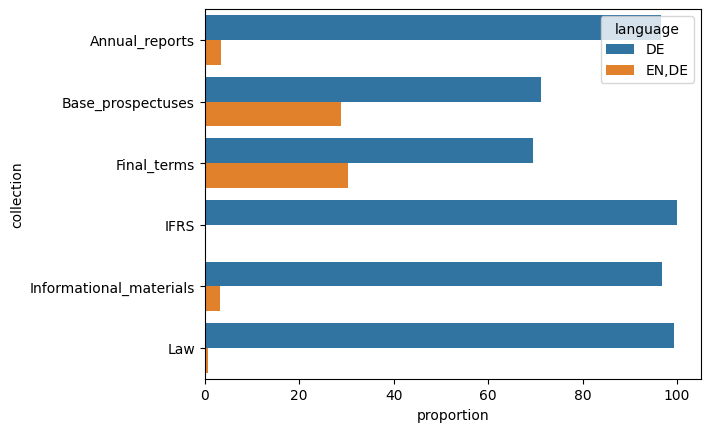

In [112]:
x = sns.barplot(
    data=ggg,
    x="proportion",
    hue="language",
    y="collection",
    # kind="bar",
)
# x.set_xlabel("")

In [143]:
ggg.loc[10, "proportion"] = 100
ggg.loc[10, "collection"] = "BBK monthly"
ggg.loc[10, "language"] = "DE"
ggg["bil_docs"] = ggg[ggg.language == "DE"]["proportion"].apply(lambda x: 100 - x)
ggg = ggg[ggg.language == "DE"]  # .rename(columns={"proportion":"DE"})
ggg

,collection,language,proportion,bil_docs
0,Annual_reports,DE,96.55,3.45
2,Base_prospectuses,DE,71.19,28.81
4,Final_terms,DE,69.60,30.40
6,IFRS,DE,100.00,0.00
7,Informational_materials,DE,96.85,3.15
9,Law,DE,99.25,0.75
10,BBK monthly,DE,100.00,0.00


Text(0, 0.5, '')

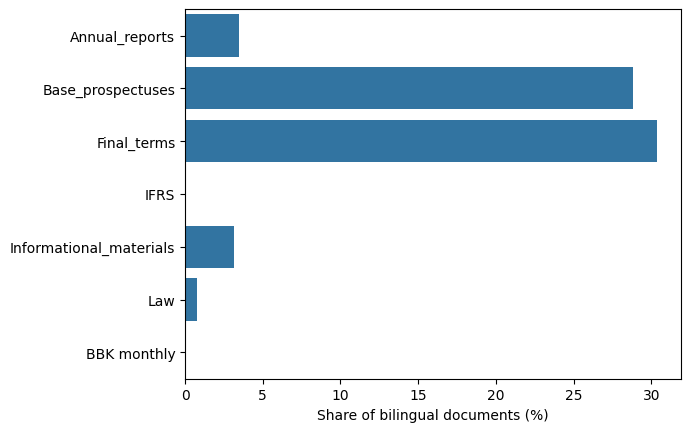

In [147]:
x = sns.barplot(
    data=ggg,
    x="bil_docs",
    hue="language",
    y="collection",
    legend=False,
    # kind="bar",
)
# x.set_xlim((0, 100))
x.set_xlabel("Share of bilingual documents (%)")
x.set_ylabel("")

In [150]:
dfl[(dfl[KCOL] == "Law") & (dfl.language == "EN,DE")]

,num_pages,source_fn,txt_fn,collection,num_chars,num_tokens,num_sentences,token_len,sentence_len,tokens_per_page,ISIN,country,pdf_only,language,is_empty,collection_name,has_text
10211,1861,Law/Gesetze_DE/Durchführungsverordnung-EU-Nr68...,Law/Durchführungsverordnung-EU-Nr680-2014.pdf.txt,Law,"6,821,524.00","1,363,872.00","44,046.00",5.00,30.96,732.87,NaN,NaN,False,"EN,DE",NaN,Law,True


In [119]:
dfl[dfl.language == "EN,DE"].groupby(KCOL).txt_fn.count()

/tmp/ipykernel_949656/1219885863.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dfl[dfl.language == "EN,DE"].groupby(KCOL).txt_fn.count()


collection_name
Final terms                2916
Base prospectuses           170
Annual reports                3
Informational materials       4
Law                           1
IFRS                          0
BBK monthly                   0
Name: txt_fn, dtype: int64

## Collections analyses

In [48]:
df[df[KCOL] == "Final terms"].describe()

,num_pages,num_chars,num_tokens,num_sentences,token_len,sentence_len,tokens_per_page
count,"10,450.00","9,591.00","9,591.00","9,591.00","9,591.00","9,591.00","9,591.00"
mean,24.94,"61,704.85","10,441.27",412.77,5.95,25.12,440.95
std,23.31,"57,493.80","10,186.65",383.20,0.46,5.46,120.41
min,1.00,"1,055.00",184.00,9.00,4.02,3.54,110.00
25%,14.00,"34,533.00","5,809.00",244.00,5.50,22.62,374.41
50%,21.00,"56,526.00","9,005.00",340.00,6.09,25.94,440.95
75%,32.00,"75,843.50","12,748.00",501.50,6.27,27.87,493.22
max,719.00,"1,420,347.00","246,143.00","8,651.00",7.07,65.76,"1,566.00"


In [59]:
dfl[dfl[KCOL] == "Final terms"].country.value_counts()

country
DE    9435
AT     156
Name: count, dtype: int64

In [49]:
df[df[KCOL] == "Final terms"].country.value_counts()

country
DE    9501
XS     255
AT     156
CH       5
FR       3
BE       1
PT       1
Name: count, dtype: int64

In [86]:
dd_pt = (
    (pd.DataFrame(df[df[KCOL] == "Final terms"].country.value_counts()))
    .join(dfl[dfl[KCOL] == "Final terms"].country.value_counts(), lsuffix="pdf")
    .rename(columns={"countpdf": "pdf", "count": "txt"})
    .astype(int, errors="ignore")
)
dd_pt

,pdf,txt
country,,
DE,9501,9435.0
XS,255,NaN
AT,156,156.0
CH,5,NaN
FR,3,NaN
BE,1,NaN
PT,1,NaN


In [87]:
table = tabulate.tabulate(
    dd_pt,
    # tablefmt="latex",
    tablefmt="latex",  #!
    # headers=dg_final_txt.columns,
    headers=dd_pt.columns,
    floatfmt=",.0f",
)
table = table.replace("nan", "-")

print(table)

\begin{tabular}{lrr}
\hline
    &   pdf &   txt \\
\hline
 DE & 9,501 & 9,435 \\
 XS &   255 &   - \\
 AT &   156 &   156 \\
 CH &     5 &   - \\
 FR &     3 &   - \\
 BE &     1 &   - \\
 PT &     1 &   - \\
\hline
\end{tabular}


In [91]:
df[(df.country.isna()) & (df[KCOL] == "Final terms")]

,num_pages,source_fn,txt_fn,collection,num_chars,num_tokens,num_sentences,token_len,sentence_len,tokens_per_page,ISIN,country,pdf_only,language,is_empty,collection_name,has_text
18,127,Final_terms/Country_of_origin_OTHER/lang_DE_EN...,NaN,Final_terms,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,NaN,NaN,Final terms,False
49,26,Final_terms/Country_of_origin_DE/lang_DE_EN/PB...,NaN,Final_terms,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,NaN,NaN,Final terms,False
73,40,Final_terms/Country_of_origin_DE/lang_DE_EN/DE...,NaN,Final_terms,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,NaN,NaN,Final terms,False
80,56,Final_terms/Country_of_origin_DE/lang_DE_EN/DE...,NaN,Final_terms,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,NaN,NaN,Final terms,False
120,58,Final_terms/Country_of_origin_DE/lang_DE_EN/DE...,NaN,Final_terms,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,NaN,NaN,Final terms,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11701,41,Final_terms/Country_of_origin_DE/lang_DE_EN/DE...,NaN,Final_terms,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,NaN,NaN,Final terms,False
11734,126,Final_terms/Country_of_origin_OTHER/lang_DE_EN...,NaN,Final_terms,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,NaN,NaN,Final terms,False
11779,120,Final_terms/Country_of_origin_OTHER/lang_DE_EN...,NaN,Final_terms,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,NaN,NaN,Final terms,False
11786,26,Final_terms/Country_of_origin_DE/lang_DE_EN/PB...,NaN,Final_terms,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,NaN,NaN,Final terms,False


In [50]:
dfl[dfl[KCOL] == "Final terms"].country.value_counts()

country
DE    9435
AT     156
Name: count, dtype: int64

In [96]:
df[df[KCOL] == "Base prospectuses"].describe()

,num_pages,num_chars,num_tokens,num_sentences,token_len,sentence_len,tokens_per_page
count,593.00,5.90e+02,590.00,590.00,590.00,590.00,590.00
mean,145.48,4.41e+05,79112.20,3312.57,5.62,25.62,494.56
std,244.78,7.87e+05,141770.78,6059.04,0.38,7.06,175.62
min,1.00,1.19e+03,183.00,8.00,4.19,10.21,143.50
25%,6.00,1.46e+04,2634.00,134.25,5.39,20.57,376.41
50%,20.00,4.99e+04,8913.00,378.00,5.60,25.19,467.20
75%,177.00,5.80e+05,103921.50,3825.00,5.87,29.01,567.03
max,1386.00,5.52e+06,917519.00,32810.00,6.84,55.06,984.45


In [24]:
dg_final.T["Final terms"] / dg_final.T["Base prospects"]

KeyError: 'Base prospects'

In [ ]:
df[(df[KCOL] == "Final terms") & (~df.ISIN.isna())]

In [ ]:
528 / 9922

In [ ]:
dfl[dfl.collection == "Final_terms"].num_tokens.sum()

In [ ]:
dfl[dfl.collection == "Final_terms"].num_pages.sum()

In [ ]:
dfl[dfl.collection == "Final_terms"].num_tokens.sum() / dfl[
    dfl.collection == "Final_terms"
].num_pages.sum()

In [ ]:
dfl[dfl.collection == "Final_terms"].num_chars.sum() / 1000000

In [ ]:
df[df[KCOL] == "BBK monthly"]

## Manually looking at languages

In [163]:
p_df1 = dfl[
    (dfl.language == "EN,DE") & (~dfl[KCOL].isin(["Final terms", "Base prospectuses"]))
]
p_df1

,num_pages,source_fn,txt_fn,collection,num_chars,num_tokens,num_sentences,token_len,sentence_len,tokens_per_page,ISIN,country,pdf_only,language,is_empty,collection_name,has_text
2087,14,Brochures_and_InfoMaterials/Country_of_origin_...,Brochures_and_InfoMaterials/emissionskalender-...,Informational_materials,"22,923.00","4,974.00",171.00,4.61,29.09,355.29,NaN,NaN,False,"EN,DE",NaN,Informational materials,True
2298,148,Annual_reports/country_of_origin_DE/lang_DE/Ja...,Annual_reports/Jahresabschluss_und_Lagebericht...,Annual_reports,"427,926.00","75,375.00","2,977.00",5.68,25.32,509.29,NaN,NaN,False,"EN,DE",NaN,Annual reports,True
2601,178,Annual_reports/country_of_origin_DE/lang_DE/An...,Annual_reports/Annual_Financial_Statements_and...,Annual_reports,"597,361.00","115,019.00","4,455.00",5.19,25.82,646.17,NaN,NaN,False,"EN,DE",NaN,Annual reports,True
6436,10,Brochures_and_InfoMaterials/Country_of_origin_...,Brochures_and_InfoMaterials/2022-12-morganstan...,Informational_materials,"25,595.00","4,454.00",197.00,5.75,22.61,445.40,NaN,NaN,False,"EN,DE",NaN,Informational materials,True
8082,185,Brochures_and_InfoMaterials/Country_of_origin_...,Brochures_and_InfoMaterials/trading-on-ssx-mod...,Informational_materials,"366,182.00","62,050.00","3,268.00",5.90,18.99,335.41,NaN,NaN,False,"EN,DE",NaN,Informational materials,True
8573,2,Brochures_and_InfoMaterials/Country_of_origin_...,Brochures_and_InfoMaterials/kurzuebersicht-fon...,Informational_materials,"6,007.00","1,561.00",94.00,3.85,16.61,780.50,NaN,NaN,False,"EN,DE",NaN,Informational materials,True
10211,1861,Law/Gesetze_DE/Durchführungsverordnung-EU-Nr68...,Law/Durchführungsverordnung-EU-Nr680-2014.pdf.txt,Law,"6,821,524.00","1,363,872.00","44,046.00",5.00,30.96,732.87,NaN,NaN,False,"EN,DE",NaN,Law,True
10425,159,Annual_reports/country_of_origin_DE/lang_DE/dl...,Annual_reports/dl_jb_2001_bav_a.pdf.txt,Annual_reports,"545,104.00","103,795.00","4,932.00",5.25,21.05,652.80,NaN,NaN,False,"EN,DE",NaN,Annual reports,True


In [164]:
DS_TXT = Path("/home/sh/hsa/papers/dataset/flattened/FULL_CLI")

NUM_LINES = 140

for i, r in p_df1.iterrows():
    f = DS_TXT / r.txt_fn
    txt = f.read_text()
    lines = txt.splitlines()
    print(r.txt_fn)
    for l in lines[:NUM_LINES]:
        print("\t" + l)
    print("===" * 20)
    print("===" * 20)
    print("===" * 20)
    print()

Brochures_and_InfoMaterials/emissionskalender-jahresvorausschau-data.pdf.txt
	 
	Pressemitteilung 
	HAUSANSCHRIFT 
	Olof-Palme-Straße 35 
	60439 Frankfurt am Main 
	 
	TEL 069 25616-1607 
	Nummer 20 vom 14. Dezember 2022 
	Seite 1 von 14 
	 
	 
	FAX 069 25616-1429 
	 
	presse@deutsche-finanzagentur.de 
	www.deutsche-finanzagentur.de 
	Emissionsplanung des Bundes für das Jahr 2023 
	 
	Der Bund wird im kommenden Jahr Bundeswertpapiere im 
	Gesamtvolumen von voraussichtlich 539 Mrd. Euro begeben. Geplant ist, 
	dass davon in Auktionen über konventionelle Bundeswertpapiere 
	insgesamt 274 Mrd. Euro am Kapitalmarkt und weitere 242 Mrd. Euro am 
	Geldmarkt aufgenommen werden. Hinzu kommen 15 Mrd. Euro bis 
	17 Mrd. Euro über Grüne Bundeswertpapiere und 6 Mrd. Euro bis 8 Mrd. 
	Euro über Inflationsindexierte Bundeswertpapiere. 
	 
	Grundsätzlich gilt für alle Bundeswertpapiere, dass sich die in der 
	Jahresvorausschau genannten Vorhaben – je nach Finanzierungsbedarf und 
	Liquiditätslage des

In [166]:
df.head()

,num_pages,source_fn,txt_fn,collection,num_chars,num_tokens,num_sentences,token_len,sentence_len,tokens_per_page,ISIN,country,pdf_only,language,is_empty,collection_name,has_text
0,19,Final_terms/Country_of_origin_DE/lang_DE_EN/DE...,Final_terms/DE000HLB7C13.pdf.txt,Final_terms,"54,319.00","8,365.00",340.00,6.49,24.60,440.26,DE000HLB7C13,DE,False,DE,NaN,Final terms,True
1,14,Final_terms/Country_of_origin_DE/lang_DE_EN/DE...,Final_terms/DE000NWB2ME7.pdf.txt,Final_terms,"23,605.00","4,354.00",183.00,5.42,23.79,311.00,DE000NWB2ME7,DE,False,"EN,DE",NaN,Final terms,True
2,25,Final_terms/Country_of_origin_DE/lang_DE_EN/DE...,Final_terms/DE000DFK0TS8.pdf.txt,Final_terms,"70,180.00","12,733.00",748.00,5.51,17.02,509.32,DE000DFK0TS8,DE,False,"EN,DE",NaN,Final terms,True
3,15,Final_terms/Country_of_origin_DE/lang_DE_EN/DE...,Final_terms/DE000LB2CZ54.pdf.txt,Final_terms,"46,594.00","7,544.00",291.00,6.18,25.92,502.93,DE000LB2CZ54,DE,False,DE,NaN,Final terms,True
4,25,Final_terms/Country_of_origin_DE/lang_DE_EN/DE...,Final_terms/DE000BLB80W4.pdf.txt,Final_terms,"59,569.00","9,578.00",350.00,6.22,27.37,383.12,DE000BLB80W4,DE,False,DE,NaN,Final terms,True


In [167]:
df.iloc[11813]

num_pages                                                        140
source_fn          Monthly_reports_BB/ocr-1999-08-monatsbericht-d...
txt_fn                                                           NaN
collection                                               BBK_monthly
num_chars                                                        NaN
num_tokens                                                       NaN
num_sentences                                                    NaN
token_len                                                        NaN
sentence_len                                                     NaN
tokens_per_page                                                  NaN
ISIN                                                             NaN
country                                                          NaN
pdf_only                                                        True
language                                                         NaN
is_empty                          